In [1]:
# Imports 
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan
from numpy import isnan
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

from sklearn.model_selection import learning_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.inspection import permutation_importance

In [2]:
#mettre une liste pour les valeurs manquante
missing_values = ["n/a", "na", "--","-1", "00","nan","NAN","NON","non"]
data_df=pd.read_csv("C:/Users/User/Desktop/proj_indiv_immoblier_septembre/train_data.csv",na_values = missing_values)
#supprimer la colonne unnamed
data_df.drop(data_df.columns[0],axis=1,inplace=True)
print('valeurs manquantes',data_df.isnull().values.any())
print('nombre de valeurs manquantes apres',data_df.isnull().sum().sum())
data_df=data_df.dropna()
data_df=data_df.drop_duplicates()
print('valeurs manquantes apres',data_df.isnull().values.any())
print('nombre de valeurs manquantes apres',data_df.isnull().sum().sum())

valeurs manquantes True
nombre de valeurs manquantes apres 176
valeurs manquantes apres False
nombre de valeurs manquantes apres 0


In [3]:
data=data_df.copy()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [4]:
# Splitting the data
trainset, testset = train_test_split(data,  test_size=.3,random_state=1)

In [5]:
X=trainset.drop(['median_house_value'],axis=1)
y=trainset["median_house_value"]
X_test=testset.drop(['median_house_value'],axis=1)
y_test=testset["median_house_value"]
dummy_clf = DummyClassifier(strategy="most_frequent")
# fit the modem
dummy_clf.fit(X,y)
# calculate the score
dummy_clf.score(X_test, y_test)

0.04386859824525607

# 1 er iteration

In [48]:
encodeur = LabelEncoder()
trainset["ocean_proximity"]=encodeur.fit_transform(trainset["ocean_proximity"])
testset["ocean_proximity"]=encodeur.transform(testset["ocean_proximity"])

standscaler=StandardScaler()
standscaler.fit(trainset).transform(trainset)
standscaler.transform(testset)

X=trainset.drop(['median_house_value'],axis=1)
y=trainset["median_house_value"]
X_test=testset.drop(['median_house_value'],axis=1)
y_test=testset["median_house_value"]

reg = LinearRegression()
reg.fit(X,y)
print("R2",reg.score(X_test, y_test))
ypred=reg.predict(X_test)
print("MSE",metrics.mean_squared_error(y_test,ypred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,ypred)))
print("MAE",metrics.mean_absolute_error(y_test,ypred))
#metrics.r2_score(y_test,ypred)

R2 0.6455188340616562
MSE 4754242410.964536
RMSE 68951.01457530944
MAE 50892.35884065842


<ipython-input-48-dda6b7e9d9ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset["ocean_proximity"]=encodeur.fit_transform(trainset["ocean_proximity"])
<ipython-input-48-dda6b7e9d9ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset["ocean_proximity"]=encodeur.transform(testset["ocean_proximity"])


In [49]:
var_test = y_test.var()
var_test
mse=metrics.mean_squared_error(y_test,ypred)
Adj_rsquare = 1-(mse/var_test)
Adj_rsquare

0.6455911623958603

Text(0, 0.5, 'Residual')

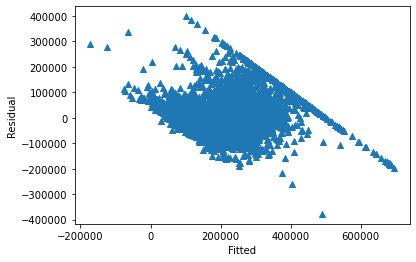

In [50]:
plt.scatter(ypred,(y_test-ypred),marker='^')
plt.xlabel("Fitted")
plt.ylabel("Residual")

In [51]:
#le model n'est pas bon il faut l'ameliorer

# 2 eme iteration
J'ai choisi le modèle DecisionTreeRegressor car il est assez facile à comprendre et ressemble en quelque sorte au processus de prise de décision général.

In [52]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(min_samples_split=100, random_state=10).fit(X, y)
print("avant le discretizer le score est",reg.score(X_test,y_test))
ypred=reg.predict(X_test)
print("MSE",metrics.mean_squared_error(y_test,ypred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,ypred)))
print("MAE",metrics.mean_absolute_error(y_test,ypred))


avant le discretizer le score est 0.7264776529479647
MSE 3668436203.8222594
RMSE 60567.61679166731
MAE 40494.03429565394


In [53]:
import pickle

with open("reg.pkl", "wb") as file:
    pickle.dump(reg, file)

In [54]:
my_model = pickle.load(open("reg.pkl","rb"))

In [55]:
my_model.score(X_test,y_test)

0.7264776529479647

# 3 eme iteration


In [11]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X_binned = enc.fit_transform(X)
X_test_binned = enc.transform(X_test)
DTR= DecisionTreeRegressor(min_samples_split=100,random_state=0).fit(X_binned, y)
print("apres le discretizer le score est",DTR.score(X_test_binned,y_test))
ypred=reg.predict(X_test)
print("MSE",metrics.mean_squared_error(y_test,ypred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,ypred)))
print("MAE",metrics.mean_absolute_error(y_test,ypred))


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


apres le discretizer le score est 0.6907059988352593
MSE 3668436203.8222594
RMSE 60567.61679166731
MAE 40494.03429565394


# 4 eme iteration

In [12]:
X=trainset.drop(['median_house_value'],axis=1)
y=trainset["median_house_value"]
X_test=testset.drop(['median_house_value'],axis=1)
y_test=testset["median_house_value"]
from sklearn.tree import DecisionTreeRegressor
std=StandardScaler()
X= std.fit_transform(X) 
X_test = std.transform(X_test) 
pca = PCA(n_components=4)
X = pca.fit_transform(X)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_.sum()


0.8821118886070142

In [13]:

X=trainset.drop(['median_house_value'],axis=1)
y=trainset["median_house_value"]
X_test=testset.drop(['median_house_value'],axis=1)
y_test=testset["median_house_value"]

model=make_pipeline(StandardScaler(), LinearRegression())
model.fit(X,y)
model.score(X_test,y_test)

0.6455188340616469

In [14]:
X=trainset.drop(['median_house_value'],axis=1)
y=trainset["median_house_value"]
X_test=testset.drop(['median_house_value'],axis=1)
y_test=testset["median_house_value"]

model=make_pipeline(StandardScaler(), DecisionTreeRegressor(min_samples_split=100,random_state=0))
model.fit(X,y)
model.score(X_test,y_test)

0.7287459277221046

In [15]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

X=trainset.drop(['median_house_value'],axis=1)
y=trainset["median_house_value"]
X_test=testset.drop(['median_house_value'],axis=1)
y_test=testset["median_house_value"]

# importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline
# pipe flow is :
# PCA(Dimension reduction to two) -> Scaling the data -> DecisionTreeClassification
pipe = Pipeline([('pca', PCA(n_components = 4)), ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)
 
# fitting the data in the pipe
pipe.fit(X, y)
 
# scoring data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   7.8s
0.014894919404203224


In [39]:
#X=trainset.drop(['median_house_value'],axis=1)
X=trainset[["median_income","households","total_rooms"]]
y=trainset["median_house_value"]
#X_test=testset.drop(['median_house_value'],axis=1)
X_test=testset[["median_income","households","total_rooms"]]
y_test=testset["median_house_value"]
from sklearn.preprocessing import PolynomialFeatures

def evalPolynonmialRegression(degree):
    #entrainement du modèle
    polynomial_features= PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X)
    X_test_poly = polynomial_features.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly,y)

 
    # Evaluation du testing set
    y_test_predict = model.predict(X_test_poly)
    rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
    r2 = metrics.r2_score(y_test, y_test_predict)
 
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    return model,r2 ,rmse

In [40]:
evalPolynonmialRegression(5)

Lerreur quadratique moyenne est 163647.50145659084
le score R2 est -0.9967817628045297


(LinearRegression(), -0.9967817628045297, 163647.50145659084)

LinearRegression()
score à l entraînement  0.5010487761867163
r2 score  0.5021005421746387
DecisionTreeRegressor(random_state=100)
score à l entraînement  1.0
r2 score  0.1555978048652239


,R2_Price
Model,
NaN,0.502101
DecisionTreeRegressor,0.155598
